<h2>Maryland House Sale Predicting</h2>

***
<h3>Introduction</h3>
<p>The following is a machine learning and neural network project on predicting house sales around Maryland, with cities in Prince George's County, Anne Arundel County and Montgomery County. The house data consists of house features and houses that were sold in the past 2 years from 2017 to present which were scraped off of Zillow. 
<p>Zillow obtains sale data from state tax records, which are all public, and this is used for our viewing. By scraping this information, we can use machine learning and neural networks to predict future sales of houses based on a vast set of features like the city it's in, the interior square feet, the interior & exterior materials, etc.</p>


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
import time
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from sklearn                 import metrics as metrics

import tensorflow as tf
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras           import regularizers

In [3]:
df = pd.read_csv("house_data_md.csv")
df.head()

,id,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,...,ExteriorMat2,Address,StreetName,Region,Zipcode,YearBuilt,PriceSqft,SalePrice,ListingURL,DateSold
0,0,Forced air,Central,Partially finished,Carpet,Laminate,Colonial,No Data,No Data,Composition,...,Shingle,"11926 Frost Dr, Bowie, MD 20720",Frost Dr,Bowie,MD 20720,1988,167,415000,https://www.zillow.com/homedetails/11926-Frost...,19-Dec
1,1,Other,Central,Partially finished,Carpet,Hardwood,Other,Brick,Brick,Shake/Shingle,...,Brick,"12333 Quarterback Ct, Bowie, MD 20720",Quarterback Ct,Bowie,MD 20720,1995,233,365000,https://www.zillow.com/homedetails/12333-Quart...,19-Dec
2,2,Heat pump,Central,Partially finished,Carpet,Wood Floors,Colonial,Other,Other,Shake/Shingle,...,Other,"12733 Hillmeade Station Dr, Bowie, MD 20720",Hillmeade Station Dr,Bowie,MD 20720,1988,165,370000,https://www.zillow.com/homedetails/12733-Hillm...,19-Dec
3,3,Forced air,Central,Partially finished,Carpet,Hardwood,Colonial,No Data,No Data,Other,...,Other,"7900 Driscoll Dr, Bowie, MD 20720",Driscoll Dr,Bowie,MD 20720,1995,131,375077,https://www.zillow.com/homedetails/7900-Drisco...,19-Dec
4,4,Baseboard,No Data,Partially finished,Carpet,Linoleum / Vinyl,Raised Ranch/Rambler,Other,Other,Shake/Shingle,...,Metal,"8513 Zug Rd, Bowie, MD 20720",Zug Rd,Bowie,MD 20720,1981,215,325000,https://www.zillow.com/homedetails/8513-Zug-Rd...,19-Dec


In [4]:
float_cols = ("TotalLivArea", "PriceSqft", "Stories", "YearBuilt", "LotSize")
int_cols   = ("Bathrooms", "Bedrooms", "FullBaths", "HalfBaths", "SalePrice")

for fcol in float_cols:
    df[fcol] = df[fcol].astype("float32")

for icol in int_cols:
     df[icol] = df[icol].astype("int32")
df.dtypes

id                 int64
Heating           object
Cooling           object
Basement          object
Flooring1         object
Flooring2         object
Architecture      object
ConstructMat1     object
ConstructMat2     object
RoofMat           object
LotSize          float32
HomeType          object
TotalLivArea     float32
Bathrooms          int32
Bedrooms           int32
FullBaths          int32
HalfBaths          int32
Stories          float32
ExteriorFeat      object
ExteriorMat1      object
ExteriorMat2      object
Address           object
StreetName        object
Region            object
Zipcode           object
YearBuilt        float32
PriceSqft        float32
SalePrice          int32
ListingURL        object
DateSold          object
dtype: object

In [5]:
df[df["SalePrice"] > 4000000]

,id,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,...,ExteriorMat2,Address,StreetName,Region,Zipcode,YearBuilt,PriceSqft,SalePrice,ListingURL,DateSold
4415,4415,Forced air,Central,None,Hardwood,Hardwood,Craftsman,Brick,Brick Front,No Data,...,No Data,"1306 Iron Oak Cv, Crofton, MD 21114",Iron Oak Cv,Crofton,MD 21114,2019.0,6348.0,14728000,https://www.zillow.com/homedetails/1306-Iron-O...,18-Jul
4815,4815,Forced air,Central,Finished basement,No Data,No Data,Colonial,No Data,No Data,Shake/Shingle,...,Vinyl,"2206 Montauk Dr, Crofton, MD 21114",Montauk Dr,Crofton,MD 21114,2000.0,3815.0,5333000,https://www.zillow.com/homedetails/2206-Montau...,17-Jun
5438,5438,No Data,No Data,None,No Data,No Data,No Data,No Data,No Data,No Data,...,No Data,"1505 Witchhazel Cir, Gambrills, MD 21054",Witchhazel Cir,Gambrills,MD 21054,2019.0,1855.0,4787000,https://www.zillow.com/homedetails/1505-Witchh...,18-May
5439,5439,Forced air,Central,Finished basement,No Data,No Data,Colonial,Brick,Combination,Shake/Shingle,...,Other,"2639 Smooth Alder St N, Gambrills, MD 21054",Smooth Alder St N,Gambrills,MD 21054,2018.0,2375.0,4787000,https://www.zillow.com/homedetails/2639-Smooth...,18-May
12531,12834,Heat pump,Central,Finished basement,Hardwood,Tile,Contemporary,No Data,No Data,Shake/Shingle,...,Other,"1178 Saint George Dr, Annapolis, MD 21409",Saint George Dr,Annapolis,MD 21409,1988.0,2876.0,4420002,https://www.zillow.com/homedetails/1178-Saint-...,17-Jun


(10.0, 0.0)

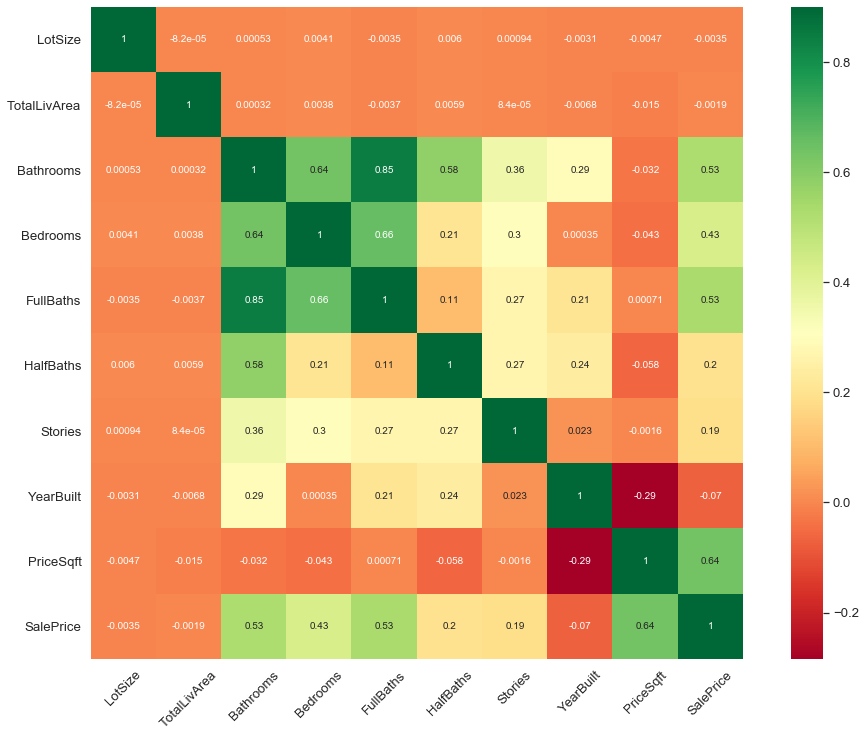

In [6]:
corrs = df.drop("id", axis=1)

plt.figure(figsize=(17, 12))
sns.set(font_scale=1.2)
sns.heatmap(corrs.corr(), cbar=True, square=True, vmax=.9, annot_kws={'size': 10}, annot=True, cmap="RdYlGn")
plt.xticks(rotation=45)

# Fix a bug on the recent version of matplotlib where the bottom and top edges 
# of the seaborn heatmaps are cutoff, creating ugly edges.
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

<h3>Takeaways from the correlation heatmap:</h3>
<p>&#x25BA; Lotsize and Total Interior Area have little correlation with other parts of the house. Lotsize makes sense, since you could have a 3,000 square feet house with an acre lot size around you for whatever you need. The size of the house mostly has little correlation with how many acres the rest of the property comes with.
<p>&#x25BA; What can matter to a lot of people when buying a house is **location**. It's proximity to Washington DC makes places like Chevy Chase and Bethesda so attractive rather than places like Crofton and Gambrills or Laurel. A 1,500 square feet in Bethesda very close to DC borders can cost over half a million. While that's certainly a bargain compared to other places, like San Francisco or New York City, that's nothing to scoth at. 
<p>&#x25BA;  Amount of full bathrooms contribute to the SalePrice more than bedrooms.

Text(0.5, 1.0, 'House Price Range')

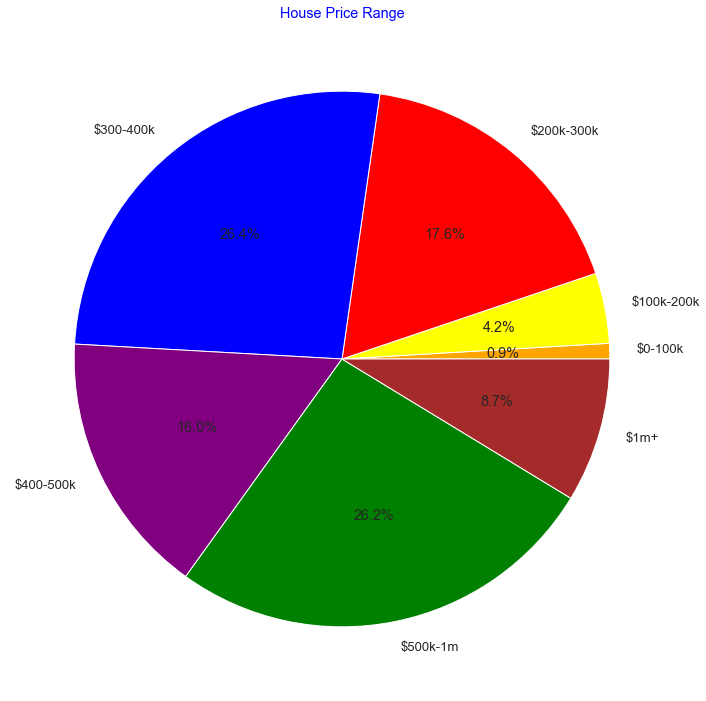

In [7]:
# A pie chart that visualizes the percentage of houses under 7 price ranges.

# https://www.kaggle.com/ecemboluk/bmw-pricing-challenge-77-true-prediction
# Adapated a pie chart that was used for car prices. 


prices = []
price_range = ["$0-100k", "$100k-200k", "$200k-300k", "$300-400k", "$400-500k", "$500k-1m", "$1m+"]
colors = ["orange", "yellow", "red", "blue", "purple", "green", "brown"]
explode = (0, 0, 0, 0, 0, 0, 0)

for i in range(1, 21):
    i = i * 50000
    # House between $0-100k
    if (i == 100000):
        x = df[df["SalePrice"] < 100000]
        prices.append(len(x))
    # House between $100k-200k
    elif (i == 200000): # i equals the 2nd part
        x = df[(df["SalePrice"] >= 100000) & (df["SalePrice"] < 200000)]
        prices.append(len(x))
    # House between $200k-300k
    elif (i == 300000):
        x = df[(df["SalePrice"] >= 200000) & (df["SalePrice"] < 300000)]
        prices.append(len(x))
    # House between $300-400k
    elif (i == 400000):
        x = df[(df["SalePrice"] >= 300000) & (df["SalePrice"] < 400000)]
        prices.append(len(x))
    # House between $400k-500k
    elif (i == 500000): 
        x = df[(df["SalePrice"] >= 400000) & (df["SalePrice"] < 500000)]
        prices.append(len(x))
    # House between $500k-1m
    elif (i == 1000000):
        x = df[(df["SalePrice"] >= 500000) & (df["SalePrice"] < 1000000)]
        prices.append(len(x))
        # House more than $1m+
        x = df[(df["SalePrice"] >= 1000000)]
        prices.append(len(x))
plt.figure(figsize=(12, 20))
plt.pie(prices, explode=explode, labels=price_range, colors=colors, autopct='%1.1f%%')
plt.title("House Price Range", color='blue')

In [8]:
df.drop(["Address", "ListingURL"], axis=1, inplace=True)

df["ExteriorFeat"].replace("View Type", "Water", inplace=True)

df = df.drop(df[df["SalePrice"] > 3500000].index).reset_index(drop=True)
df = df.drop(df[df["SalePrice"] < 10000].index).reset_index(drop=True)

<br>
&#x25BA; Maryland is not shy of million dollar homes, so lets explore them.
<p>&#x25BA; A lot of houses have abnormal prices, like a 2500 square feet townhouse in Crofton for \$14 million. So we'll drop them.

In [9]:
millionaires = df[df["SalePrice"] > 1000000]
print(millionaires["SalePrice"].max())
millionaires

3495000


,id,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,...,ExteriorFeat,ExteriorMat1,ExteriorMat2,StreetName,Region,Zipcode,YearBuilt,PriceSqft,SalePrice,DateSold
1088,1089,Forced air,Central,None,Carpet,Laminate,Colonial,No Data,No Data,Shake/Shingle,...,Yard,Brick,Brick,Kenhill Dr,Bowie,MD 20715,1963.0,1763.0,3299900,17-Jun
3569,3570,Heat pump,Central,Partially finished,Hardwood,Hardwood,Craftsman,Other,Wood Siding,Shake/Shingle,...,None,Other,Wood,Patuxent River Rd,Davidsonville,MD 21035,1938.0,992.0,1750000,19-Sep
3578,3579,Forced air,Central,None,Hardwood,Hardwood,Colonial,Brick,Vinyl Siding,Shake/Shingle,...,Patio,Other,Other,Wayson Rd,Davidsonville,MD 21035,2013.0,195.0,1295000,19-Aug
3580,3581,Heat pump,No Data,Partially finished,No Data,No Data,Colonial,No Data,No Data,Shake/Shingle,...,Patio,Other,Other,Santa Maria Ln,Davidsonville,MD 21035,1989.0,220.0,1195000,19-Aug
3598,3599,Heat pump,Central,Unfinished basement,Hardwood,Tile,Craftsman,No Data,No Data,Shake/Shingle,...,Patio,Other,Other,Merrimac Rd,Davidsonville,MD 21035,2008.0,273.0,1149000,19-May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,13114,Radiant,Central,Partially finished,Hardwood,Hardwood,Colonial,No Data,No Data,Slate,...,Water,Shingle,Shingle,Grove St,Chevy Chase,MD 20815,1936.0,463.0,1500000,17-Jul
12604,13115,Forced air,Central,Finished basement,No Data,No Data,Colonial,No Data,No Data,Slate,...,Patio,Wood,Wood,Oxford St,Chevy Chase,MD 20815,1925.0,532.0,2500000,17-Jun
12606,13118,Forced air,Central,Finished basement,Carpet,Hardwood,No Data,No Data,No Data,Built up,...,Patio,Brick,Brick,Greystone St,Chevy Chase,MD 20815,1956.0,379.0,1315000,17-Jun
12609,13124,Forced air,Central,Finished basement,Carpet,Concrete,Colonial,No Data,No Data,Composition,...,Patio,Brick,Cement concrete,Langdrum Ln,Chevy Chase,MD 20815,1966.0,287.0,1250000,17-Jun


Text(0, 0.5, 'House Price')

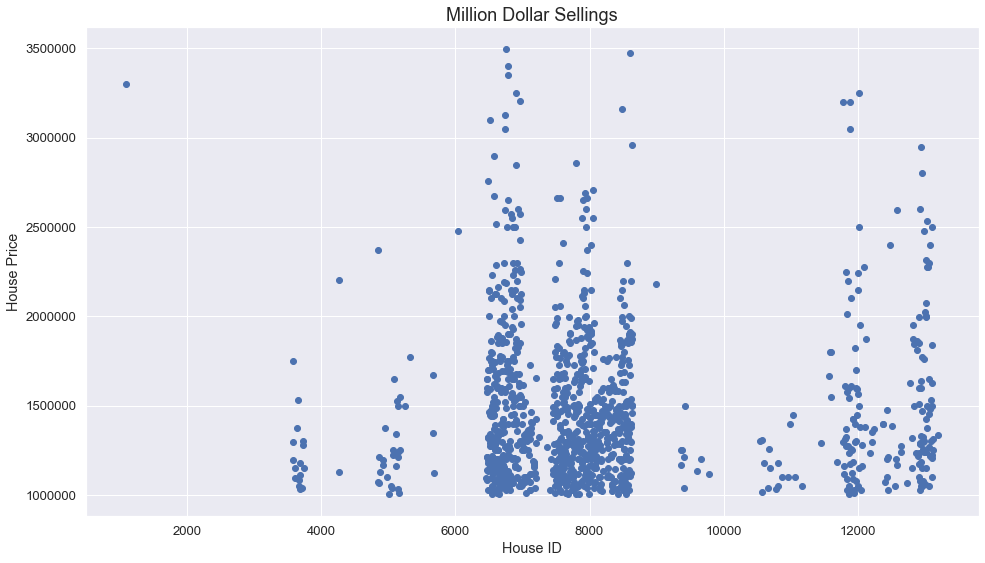

In [10]:
plt.figure(figsize=(16, 9))
plt.title("Million Dollar Sellings", fontsize=18)
plt.scatter(x=millionaires["id"], y=millionaires["SalePrice"])
plt.xlabel("House ID")
plt.ylabel("House Price")

In [11]:
millionaires[millionaires["SalePrice"] > 3000000]

,id,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,...,ExteriorFeat,ExteriorMat1,ExteriorMat2,StreetName,Region,Zipcode,YearBuilt,PriceSqft,SalePrice,DateSold
1088,1089,Forced air,Central,None,Carpet,Laminate,Colonial,No Data,No Data,Shake/Shingle,...,Yard,Brick,Brick,Kenhill Dr,Bowie,MD 20715,1963.0,1763.0,3299900,17-Jun
6502,6519,Forced air,Central,Partially finished,Hardwood,Hardwood,Colonial,Fiber Cement,Fiber Cement,Other,...,Patio,Cement concrete,Cement concrete,Shepherd St,Chevy Chase,MD 20815,1906.0,1782.0,3100000,19-Aug
6726,6745,Forced air,Central,None,Carpet,Wood Floors,Contemporary,Brick,Brick,No Data,...,Water,Brick,Brick,Wisconsin Ave,Chevy Chase,MD 20815,1999.0,897.0,3050000,20-Jan
6727,6746,Forced air,Central,Finished basement,Hardwood,Hardwood,No Data,No Data,No Data,Other,...,None,Other,Other,W Kirke St,Chevy Chase,MD 20815,1911.0,561.0,3125000,20-Jan
6738,6758,Forced air,Central,Finished basement,No Data,No Data,Colonial,Other,Other,Shake/Shingle,...,None,Other,Other,Quincy St,Chevy Chase,MD 20815,2011.0,505.0,3495000,19-Nov
6760,6781,Baseboard,Central,Finished basement,Carpet,Wood Floors,Colonial,Stucco,Stucco,Slate,...,Patio,Stucco,Wood,W Irving St,Chevy Chase,MD 20815,1914.0,479.0,3400000,19-Sep
6761,6782,Radiant,No Data,Finished basement,No Data,No Data,No Data,No Data,No Data,Shake/Shingle,...,Patio,Other,Other,E Lenox St,Chevy Chase,MD 20815,1918.0,759.0,3350000,19-Aug
6881,6903,Forced air,Central,Finished basement,Hardwood,Hardwood,Colonial,No Data,No Data,Composition,...,Patio,Stone,Stone,Surrey St,Chevy Chase,MD 20815,2011.0,516.0,3250000,18-May
6933,6956,Forced air,Central,Finished basement,Carpet,Hardwood,Colonial,No Data,No Data,Other,...,Patio,Brick,Brick,E Melrose St,Chevy Chase,MD 20815,1988.0,397.0,3204000,17-Aug
8445,8485,Forced air,Central,Partially finished,Wood Floors,Wood Floors,Contemporary,Frame,Other,Shake/Shingle,...,Water,Other,Wood,Wehawken Rd,Bethesda,MD 20816,2019.0,391.0,3160000,19-Aug


Bethesda         541
Chevy Chase      378
Annapolis        100
Kensington        47
Crownsville       24
Davidsonville     16
Takoma Park       10
Silver Spring     10
Odenton            4
Gambrills          2
Crofton            2
College Park       1
Bowie              1
Millersville       1
Name: Region, dtype: int64


Text(0, 0.5, 'Percentage of House Above $1 Million')

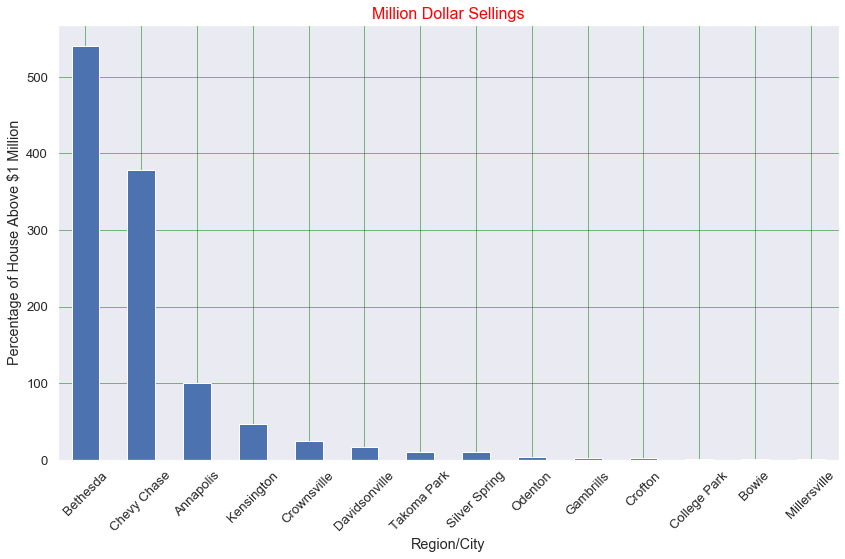

In [12]:
mills = millionaires["Region"].value_counts()
print(mills)

mills.plot(kind="bar", figsize=(14, 8))
plt.grid(linestyle="-", linewidth=0.5, color="green")
plt.title("Million Dollar Sellings", fontsize=16, color="red")
plt.xlabel("Region/City")
plt.xticks(rotation=45)
plt.ylabel("Percentage of House Above $1 Million")

In [13]:
print(len(df["Region"].unique()))
df["Region"].unique()

32


array(['Bowie', 'Glenn Dale', 'Laurel', 'Mitchellville', 'Lanham',
       'Upper Marlboro', 'Springdale', 'Largo', 'Davidsonville',
       'Gambrills', 'Harwood', 'Riva', 'Edgewater', 'Greenbelt',
       'Hyattsville', 'Crofton', 'Crownsville', 'Millersville',
       'Annapolis', 'Severn', 'Odenton', 'Overlook', 'Chevy Chase',
       'Kensington', 'Bethesda', 'Silver Spring', 'College Park',
       'Berwyn Heights', 'Riverdale', 'Takoma Park', 'Wheaton',
       'Highland Bch'], dtype=object)

Bowie -- 2953 Houses -- $353105.36
Glenn Dale -- 1849 Houses -- $424020.51
Laurel -- 1708 Houses -- $274000.00
Mitchellville -- 1184 Houses -- $419735.83
Lanham -- 872 Houses -- $307660.22
Upper Marlboro -- 671 Houses -- $290723.69
Springdale -- 600 Houses -- $389484.00
Largo -- 579 Houses -- $395802.50
Davidsonville -- 433 Houses -- $655380.75
Gambrills -- 381 Houses -- $475832.74
Harwood -- 372 Houses -- $626473.33
Riva -- 350 Houses -- $392500.00
Edgewater -- 316 Houses -- $600000.00
Greenbelt -- 295 Houses -- $91762.43
Hyattsville -- 265 Houses -- $345526.50
Crofton -- 212 Houses -- $397604.22
Crownsville -- 182 Houses -- $535926.55
Millersville -- 17 Houses -- $687068.14
Annapolis -- 14 Houses -- $517634.30
Severn -- 7 Houses -- $453333.33
Odenton -- 6 Houses -- $359992.84
Overlook -- 4 Houses -- $204000.00
Chevy Chase -- 4 Houses -- $1165252.18
Kensington -- 3 Houses -- $654957.11
Bethesda -- 3 Houses -- $1069336.54
Silver Spring -- 3 Houses -- $464842.73
College Park -- 3 Houses

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

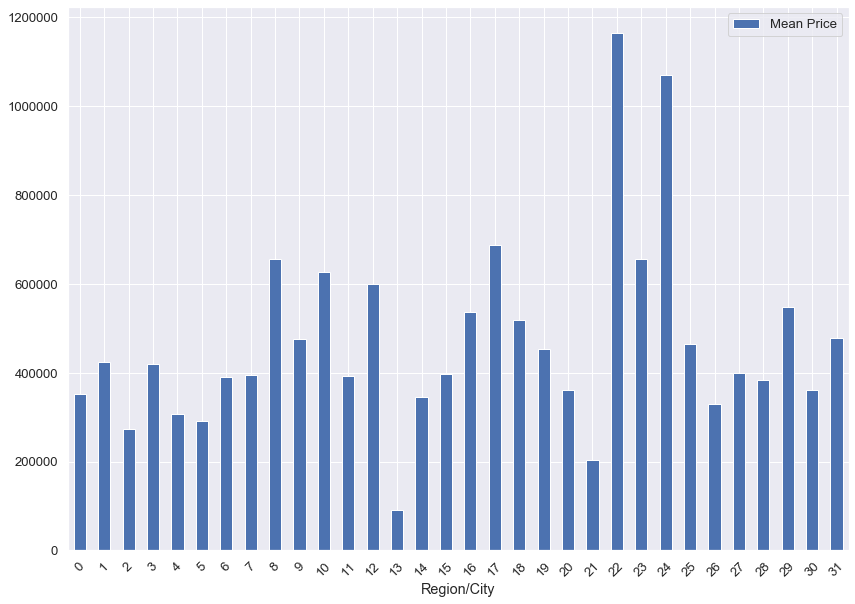

In [14]:
mean_prices = []
regions = []

for count, region in zip(df["Region"].value_counts(), df["Region"].unique()):
    means = df[df["Region"] == region]
    mean_prices.append(means["SalePrice"].mean())
    regions.append(region)
    print(region, "-- {} Houses -- ${:7.2f}".format(count, means["SalePrice"].mean()))

mp_df = pd.DataFrame({"Region/City": regions, "Mean Price": mean_prices})
print(mp_df.head())

mp_df.plot(kind="bar", figsize=(14, 10))
plt.xlabel("Region/City")
plt.xticks(rotation=45)

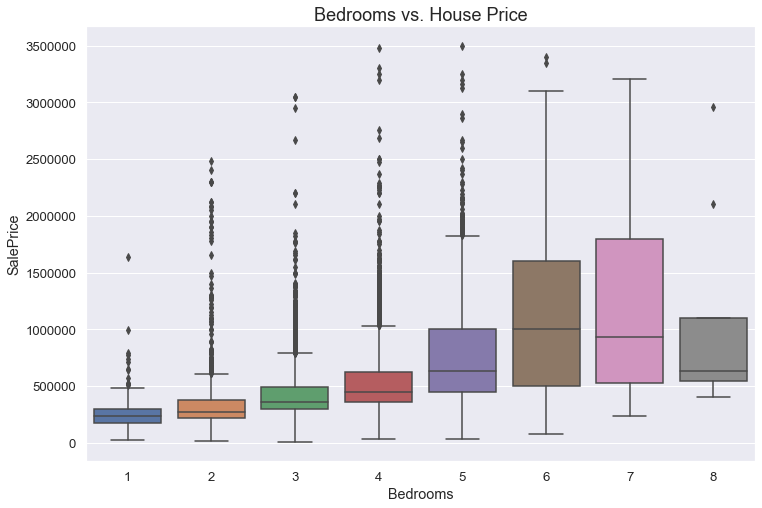

In [15]:
plt.figure(figsize=(12, 8))
plt.title("Bedrooms vs. House Price", fontsize=18)
sns.boxplot(x=df["Bedrooms"], y=df["SalePrice"])

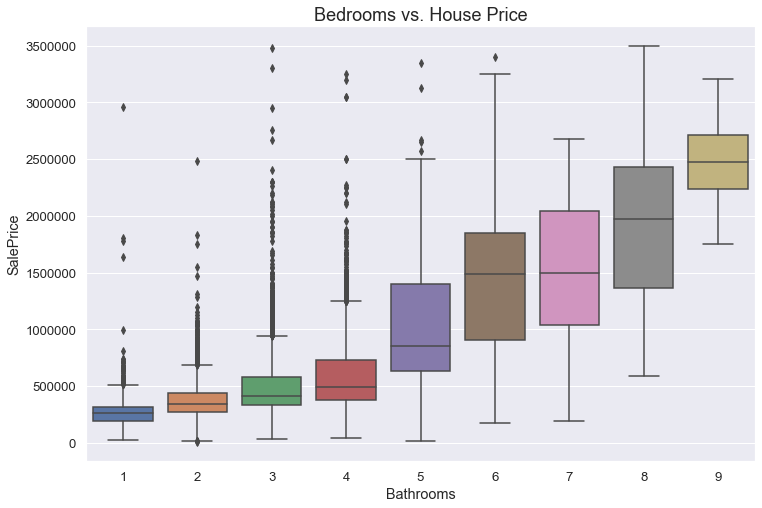

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Bedrooms vs. House Price", fontsize=18)
sns.boxplot(x=df["Bathrooms"], y=df["SalePrice"])

Text(0, 0.5, 'House Price')

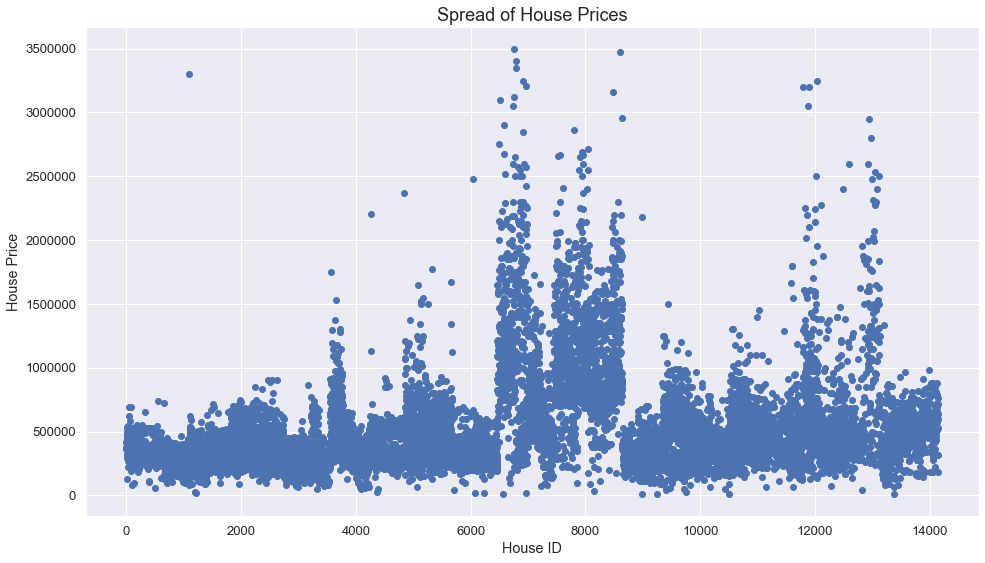

In [17]:
plt.figure(figsize=(16, 9))
plt.title("Spread of House Prices", fontsize=18)
plt.scatter(x=df["id"], y=df["SalePrice"])
plt.xlabel("House ID")
plt.ylabel("House Price")

<p>&#x25BA; This scatter plot is not intended to show any relationship between the house id and the house price but to just visualize all the house prices in the dataset and any range.

<p>&#x25BA; Compared to all other houses, houses above \$5 million seems out of place, maybe someone paid significantly above asking price because they really want that house far above other buyers. A lot of house have a sale price well below \$5 million, but don't want to drop houses too expensive or anything above \$1 million, so we'll compromise at around \$2 million.
<p>&#x25BA; Contrary, there are also houses that are into the 4 figures, below \$10,000, some as low as \$2,000. This could possibly be rental prices mistaken as buying prices in the public records. We'll remove these houses too to avoid outliers.

In [18]:
df = df.drop(df[df["SalePrice"] > 2250000].index).reset_index(drop=True)

In [19]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(list(df[c].values))

In [20]:
X = df.drop(["id", "SalePrice"], axis=1)
y = df["SalePrice"]

# Normalize the dataset to make calculations easier.
# Use normalization when the dataset consists of a large range of numbers.
X = (X - X.mean())/X.std()
X.head()

,Heating,Cooling,Basement,Flooring1,Flooring2,Architecture,ConstructMat1,ConstructMat2,RoofMat,LotSize,...,Stories,ExteriorFeat,ExteriorMat1,ExteriorMat2,StreetName,Region,Zipcode,YearBuilt,PriceSqft,DateSold
0,-0.566162,-0.339932,1.057355,-1.333007,-0.559853,-0.669273,0.388164,0.337785,-1.279999,-0.008273,...,-1.780172,0.136127,-0.111766,0.402013,-0.551418,-0.730951,-1.274911,0.508648,-0.635551,0.660466
1,2.061721,-0.339932,1.057355,-1.333007,-0.831609,1.055626,-1.558450,-1.707269,0.676154,-0.010110,...,0.900171,0.136127,-0.951566,-1.234592,0.755933,-0.730951,-1.274911,0.775996,-0.062398,0.660466
2,1.010568,-0.339932,1.057355,-1.333007,2.701225,-0.669273,0.490617,0.440038,0.676154,-0.009309,...,0.900171,0.136127,0.448101,0.129246,-0.289610,-0.730951,-1.274911,0.508648,-0.652919,0.660466
3,-0.566162,-0.339932,1.057355,-1.333007,-0.831609,-0.669273,0.388164,0.337785,0.187116,-0.008885,...,0.900171,-1.699537,0.448101,0.129246,-0.848697,-0.730951,-1.274911,0.775996,-0.948180,0.660466
4,-1.617315,2.060593,1.057355,-1.333007,-0.016340,1.320995,0.490617,0.440038,0.676154,-0.009403,...,0.006723,0.136127,-0.671633,-0.416289,1.676484,-0.730951,-1.274911,0.241300,-0.218713,0.660466


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (10577, 26)
X_test shape:  (2645, 26)
y_train shape: (10577,)
y_test shape:  (2645,)


&#x25BA; Begin the algorithmic testing of the dataset. For each model, the data will be fitted to the model, an accuracy percentage will be given and an error will be tested. All of this will be displayed for each model and a final list of the metrics at the end of the notebook.

<h2>Linear Regression</h2>

In [22]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)

y_linear_pred = linear_reg.predict(X_test)

linear_acc = linear_reg.score(X_test, y_test)
print("Intercept:     {:5.2f}".format(linear_reg.intercept_))
print("Coefficient Mean: {:5.2f}".format(linear_reg.coef_.mean()))
print("Accuracy:     {:5.7f}".format(linear_acc))

Intercept:     508804.84
Coefficient Mean: 13522.89
Accuracy:     0.7172320


In [23]:
linear_df = pd.DataFrame({"Actual": y_test, "Predicted": y_linear_pred})
linear_df.head()

,Actual,Predicted
2019,403000,324128.214690
1595,649000,787938.746319
11511,565000,655246.095644
5140,315000,201944.087311
5858,355000,577003.423546


Text(0, 0.5, 'House Price [$]')

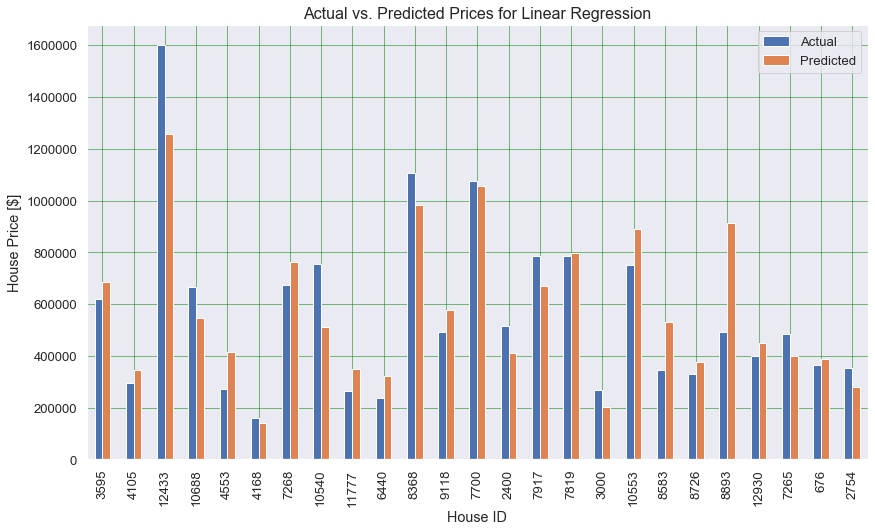

In [24]:
# Plot these predicted test values for 25 of them.
# Example inspired by 
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

df1 = linear_df.sample(25)
df1.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Linear Regression", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [25]:
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_linear_pred)) )
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_linear_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_linear_pred))) )

Mean Absolute Error:     $125456.84
Mean Squared Error:      $30468765445.41
Root Mean Squared Error: $174553.04


<h2>Random Forest Regressor</h2>

In [26]:
rf_params = {"min_samples_split": [4, 8, 12, 16], "n_estimators": [25, 75, 100]}

rf = RandomForestRegressor()
rf_grids = GridSearchCV(rf, rf_params)
rf_grids.fit(X_train, y_train)
print(rf_grids.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [27]:
rf_reg = RandomForestRegressor(min_samples_split=4, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)
rf_reg.fit(X_train, y_train)

y_rf_pred = rf_reg.predict(X_test)
rf_acc = rf_reg.score(X_test, y_test)
print("Accuracy: {:5.7f}".format(rf_acc))

Accuracy: 0.9967604


In [28]:
# Get feature_importances of rf for all features
rf_features = []
for name, score in zip(X, rf_reg.feature_importances_):
    rf_features.append([score, name])
    
rf_features = sorted(rf_features, reverse=True)
for scores in rf_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))

0.4666328 - PriceSqft 
0.3955514 - TotalLivArea 
0.1303083 - Bathrooms 
0.0015974 - Region 
0.0012410 - Zipcode 
0.0007614 - YearBuilt 
0.0005641 - LotSize 
0.0004006 - DateSold 
0.0003971 - StreetName 
0.0002860 - ExteriorMat2 
0.0002345 - ConstructMat2 
0.0002160 - Architecture 
0.0002042 - RoofMat 
0.0001793 - ConstructMat1 
0.0001704 - ExteriorMat1 
0.0001631 - Bedrooms 
0.0001623 - ExteriorFeat 
0.0001547 - Stories 
0.0001410 - FullBaths 
0.0001401 - HalfBaths 
0.0001386 - Heating 
0.0000969 - Flooring2 
0.0000933 - Basement 
0.0000746 - Flooring1 
0.0000595 - Cooling 
0.0000316 - HomeType 


In [29]:
rf_df = pd.DataFrame({"Actual": y_test, "Predicted": y_rf_pred})
rf_df.head()

,Actual,Predicted
2019,403000,398003.868286
1595,649000,652965.412095
11511,565000,572807.821381
5140,315000,315214.580635
5858,355000,355854.119048


Text(0, 0.5, 'House Price [$]')

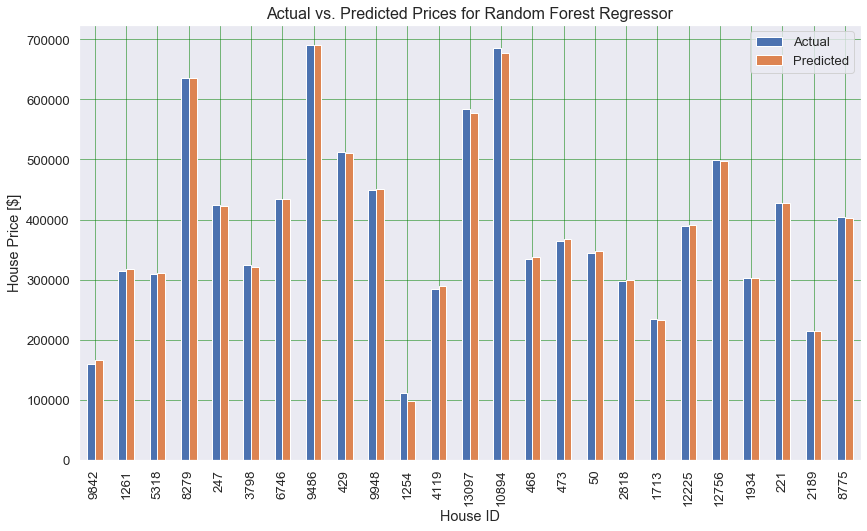

In [30]:
df2 = rf_df.sample(25)
df2.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Random Forest Regressor", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [31]:
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_rf_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_rf_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred))))

Mean Absolute Error:     $5560.02
Mean Squared Error:      $349072939.26
Root Mean Squared Error: $18683.49


<h2>Gradient Boost Regressor</h2>

In [32]:
gb_params = {"learning_rate": [0.001, 0.01, 0.1], "n_estimators": [25, 50, 75, 100], 
             "min_samples_split": [2, 4, 8, 12], "random_state": [42]}

gb = GradientBoostingRegressor()
gb_grids = GridSearchCV(gb, gb_params)
gb_grids.fit(X_train, y_train)
print(gb_grids.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [33]:
gb_reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, 
                                   min_samples_split=8, random_state=42)
gb_reg.fit(X_train, y_train)

y_gb_pred = gb_reg.predict(X_test)
gb_acc = gb_reg.score(X_test, y_test)
print("Accuracy: {:5.7f}".format(gb_acc))

Accuracy: 0.9927431


In [34]:
# Get feature_importances of rf for all features
gb_features = []
for name, score in zip(X, gb_reg.feature_importances_):
    gb_features.append([score, name])
    
gb_features = sorted(gb_features, reverse=True)
for scores in gb_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))

0.4752884 - PriceSqft 
0.4232929 - TotalLivArea 
0.0977050 - Bathrooms 
0.0020174 - Region 
0.0013797 - Zipcode 
0.0000805 - FullBaths 
0.0000792 - LotSize 
0.0000688 - YearBuilt 
0.0000411 - Bedrooms 
0.0000165 - ConstructMat2 
0.0000144 - ExteriorMat2 
0.0000067 - ExteriorMat1 
0.0000054 - Stories 
0.0000041 - DateSold 
0.0000000 - StreetName 
0.0000000 - RoofMat 
0.0000000 - HomeType 
0.0000000 - Heating 
0.0000000 - HalfBaths 
0.0000000 - Flooring2 
0.0000000 - Flooring1 
0.0000000 - ExteriorFeat 
0.0000000 - Cooling 
0.0000000 - ConstructMat1 
0.0000000 - Basement 
0.0000000 - Architecture 


In [35]:
gb_df = pd.DataFrame({"Actual": y_test, "Predicted": y_gb_pred})
gb_df.head()

,Actual,Predicted
2019,403000,400133.797972
1595,649000,614565.781869
11511,565000,603029.484512
5140,315000,331162.875325
5858,355000,360963.951555


Text(0, 0.5, 'House Price [$]')

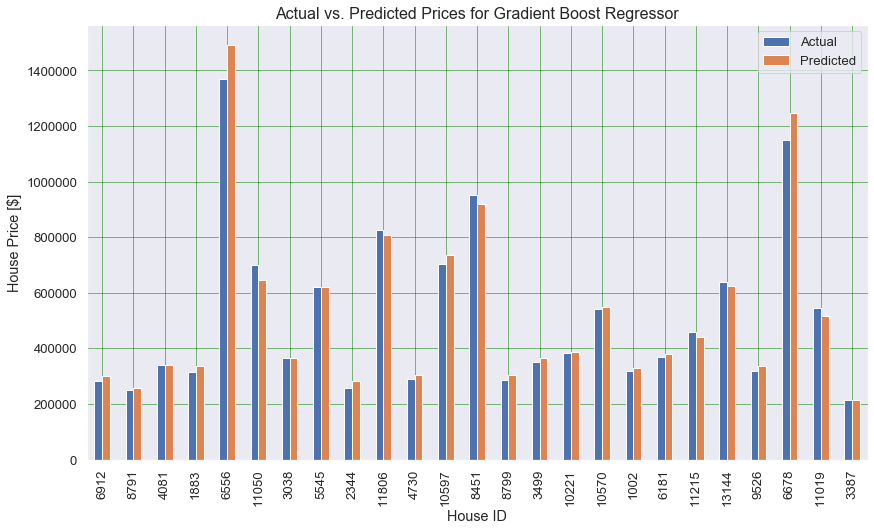

In [36]:
df3 = gb_df.sample(25)
df3.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Gradient Boost Regressor", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [37]:
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_gb_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_gb_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_gb_pred))))

Mean Absolute Error:     $16046.24
Mean Squared Error:      $781949560.75
Root Mean Squared Error: $27963.36


<h2>The Feedforward Neural Network</h2>

In [56]:
def build_model():
    model = Sequential()

    # Input layer
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.070), input_shape=[X_train.shape[1]]))
    model.add(Activation("elu"))

    # Hidden Layer 1
    model.add(Dense(256, kernel_regularizer=regularizers.l2(0.065), bias_regularizer=regularizers.l2(0.009)))
    model.add(Activation("elu"))
    model.add(Dropout(0.15))

    # Hidden Layer 2
    model.add(Dense(256, kernel_regularizer=regularizers.l2(0.080), bias_regularizer=regularizers.l2(0.009)))
    model.add(Activation("elu"))
    model.add(Dropout(0.15))

    # Hidden Layer 3
    model.add(Dense(128, kernel_regularizer=regularizers.l2(0.060), bias_regularizer=regularizers.l2(0.009)))
    model.add(Activation("elu"))
    model.add(Dropout(0.1))
    
    # Hidden Layer 4
    model.add(Dense(128, kernel_regularizer=regularizers.l2(0.060), bias_regularizer=regularizers.l2(0.009)))
    model.add(Activation("elu"))
    model.add(Dropout(0.1))

    # Hidden Layer 5
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.080), bias_regularizer=regularizers.l2(0.009)))
    model.add(Activation("elu"))
    model.add(Dropout(0.1))
    
    # Hidden Layer 6
    model.add(Dense(64, kernel_regularizer=regularizers.l2(0.060), bias_regularizer=regularizers.l2(0.009)))
    model.add(Activation("elu"))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1))
    
    # optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])    
    
    return model    

In [57]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                1728      
_________________________________________________________________
activation_22 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               16640     
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_24 (Activation)   (None, 256)              

In [58]:
EPOCHS = 250

# es = EarlyStopping(monitor="val_mae", min_delta=3500, mode="min", patience=25, verbose=1)

last_time = time.time()
model_history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, batch_size=64, verbose=1)#, callbacks=[es])
# model.save("nn_house_model.h5")
print("\nModel took approximately {:5.2f} seconds to train.".format(time.time() - last_time))

Train on 8461 samples, validate on 2116 samples
Epoch 1/250
8461/8461 [==============================] - 2s 215us/sample - loss: 208139522231.9594 - mae: 343283.3438 - mse: 208139616256.0000 - val_loss: 38215593620.0832 - val_mae: 135769.8438 - val_mse: 38215598080.0000
Epoch 2/250
8461/8461 [==============================] - 1s 97us/sample - loss: 40111051535.2795 - mae: 137083.9062 - mse: 40111046656.0000 - val_loss: 33199397778.6314 - val_mae: 120011.1641 - val_mse: 33199390720.0000
Epoch 3/250
8461/8461 [==============================] - 1s 99us/sample - loss: 35786497597.5417 - mae: 130554.9453 - mse: 35786510336.0000 - val_loss: 31818057681.5425 - val_mae: 115896.9062 - val_mse: 31818053632.0000
Epoch 4/250
8461/8461 [==============================] - 1s 97us/sample - loss: 33864600503.9896 - mae: 125938.2109 - mse: 33864599552.0000 - val_loss: 30387503217.2401 - val_mae: 111399.4062 - val_mse: 30387505152.0000
Epoch 5/250
8461/8461 [==============================] - 1s 96us/samp

8461/8461 [==============================] - 1s 99us/sample - loss: 21897642920.0142 - mae: 101390.4531 - mse: 21897641984.0000 - val_loss: 17864721738.0416 - val_mae: 87585.0938 - val_mse: 17864722432.0000
Epoch 38/250
8461/8461 [==============================] - 1s 95us/sample - loss: 21280930358.4011 - mae: 99386.9297 - mse: 21280925696.0000 - val_loss: 17288058159.9093 - val_mae: 85472.4219 - val_mse: 17288058880.0000
Epoch 39/250
8461/8461 [==============================] - 1s 97us/sample - loss: 21366469660.1990 - mae: 99697.4062 - mse: 21366470656.0000 - val_loss: 17861767771.9471 - val_mae: 86602.0000 - val_mse: 17861771264.0000
Epoch 40/250
8461/8461 [==============================] - 1s 94us/sample - loss: 21771249442.0385 - mae: 100101.1719 - mse: 21771255808.0000 - val_loss: 17823367835.8261 - val_mae: 85648.0391 - val_mse: 17823367168.0000
Epoch 41/250
8461/8461 [==============================] - 1s 95us/sample - loss: 20891441552.3536 - mae: 98815.3750 - mse: 20891447296.

8461/8461 [==============================] - 1s 93us/sample - loss: 18928111781.6844 - mae: 93840.0391 - mse: 18928111616.0000 - val_loss: 16771682856.1664 - val_mae: 83571.9688 - val_mse: 16771681280.0000
Epoch 75/250
8461/8461 [==============================] - 1s 92us/sample - loss: 19097479230.2073 - mae: 94402.2188 - mse: 19097487360.0000 - val_loss: 16297951561.0737 - val_mae: 82760.8984 - val_mse: 16297952256.0000
Epoch 76/250
8461/8461 [==============================] - 1s 95us/sample - loss: 19077908101.6731 - mae: 93831.6953 - mse: 19077908480.0000 - val_loss: 17866826952.8318 - val_mae: 85778.9766 - val_mse: 17866827776.0000
Epoch 77/250
8461/8461 [==============================] - 1s 95us/sample - loss: 18494035216.9134 - mae: 93238.8750 - mse: 18494038016.0000 - val_loss: 16311019253.8374 - val_mae: 82155.1797 - val_mse: 16311018496.0000
Epoch 78/250
8461/8461 [==============================] - 1s 92us/sample - loss: 19338619434.5406 - mae: 93367.2656 - mse: 19338620928.00

8461/8461 [==============================] - 1s 93us/sample - loss: 16683862686.9675 - mae: 88516.6328 - mse: 16683859968.0000 - val_loss: 17391943378.0265 - val_mae: 83773.9766 - val_mse: 17391941632.0000
Epoch 112/250
8461/8461 [==============================] - 1s 93us/sample - loss: 17367004909.8159 - mae: 89714.5156 - mse: 17367005184.0000 - val_loss: 16303129059.6900 - val_mae: 81548.5391 - val_mse: 16303127552.0000
Epoch 113/250
8461/8461 [==============================] - 1s 94us/sample - loss: 16582369052.1083 - mae: 87911.1719 - mse: 16582369280.0000 - val_loss: 17615749092.8998 - val_mae: 84110.4219 - val_mse: 17615745024.0000
Epoch 114/250
8461/8461 [==============================] - 1s 95us/sample - loss: 17290997419.5542 - mae: 89868.1484 - mse: 17290991616.0000 - val_loss: 16966989423.3043 - val_mae: 82933.6484 - val_mse: 16966988800.0000
Epoch 115/250
8461/8461 [==============================] - 1s 93us/sample - loss: 16870934033.0041 - mae: 88699.6016 - mse: 1687092736

8461/8461 [==============================] - 1s 94us/sample - loss: 14728262301.8178 - mae: 84708.4844 - mse: 14728256512.0000 - val_loss: 16430202140.5520 - val_mae: 80985.7891 - val_mse: 16430202880.0000
Epoch 149/250
8461/8461 [==============================] - 1s 96us/sample - loss: 14942367539.5873 - mae: 84494.3672 - mse: 14942363648.0000 - val_loss: 16890017834.8280 - val_mae: 81650.5625 - val_mse: 16890014720.0000
Epoch 150/250
8461/8461 [==============================] - 1s 96us/sample - loss: 15347562364.6869 - mae: 84986.1172 - mse: 15347560448.0000 - val_loss: 16664916079.1834 - val_mae: 81030.1016 - val_mse: 16664914944.0000
Epoch 151/250
8461/8461 [==============================] - 1s 94us/sample - loss: 14866459911.9575 - mae: 84550.7656 - mse: 14866456576.0000 - val_loss: 17571385518.2155 - val_mae: 83337.4922 - val_mse: 17571385344.0000
Epoch 152/250
8461/8461 [==============================] - 1s 96us/sample - loss: 15037468038.0664 - mae: 84265.3672 - mse: 1503746355

8461/8461 [==============================] - 1s 97us/sample - loss: 13809685737.7010 - mae: 81307.4688 - mse: 13809681408.0000 - val_loss: 16895404396.7637 - val_mae: 81640.8672 - val_mse: 16895401984.0000
Epoch 186/250
8461/8461 [==============================] - 1s 94us/sample - loss: 14338536317.6551 - mae: 82460.9922 - mse: 14338532352.0000 - val_loss: 16869630941.1569 - val_mae: 81622.8047 - val_mse: 16869625856.0000
Epoch 187/250
8461/8461 [==============================] - 1s 94us/sample - loss: 14318708703.3230 - mae: 82605.7656 - mse: 14318705664.0000 - val_loss: 18582909276.4310 - val_mae: 84560.9766 - val_mse: 18582902784.0000
Epoch 188/250
8461/8461 [==============================] - 1s 97us/sample - loss: 13988532419.3358 - mae: 81686.2812 - mse: 13988527104.0000 - val_loss: 17272022528.9679 - val_mae: 81930.2344 - val_mse: 17272018944.0000
Epoch 189/250
8461/8461 [==============================] - 1s 96us/sample - loss: 14008627729.5488 - mae: 81532.2656 - mse: 1400862208

8461/8461 [==============================] - 1s 97us/sample - loss: 13518800282.1567 - mae: 79998.9688 - mse: 13518796800.0000 - val_loss: 17302689524.8696 - val_mae: 81639.2031 - val_mse: 17302685696.0000
Epoch 223/250
8461/8461 [==============================] - 1s 94us/sample - loss: 12803532264.7328 - mae: 79338.3750 - mse: 12803527680.0000 - val_loss: 17221619731.3573 - val_mae: 82374.0781 - val_mse: 17221615616.0000
Epoch 224/250
8461/8461 [==============================] - 1s 98us/sample - loss: 12905340933.0831 - mae: 79387.5703 - mse: 12905335808.0000 - val_loss: 17802090835.7202 - val_mae: 81831.6953 - val_mse: 17802084352.0000
Epoch 225/250
8461/8461 [==============================] - 1s 94us/sample - loss: 12582243202.6777 - mae: 77757.5781 - mse: 12582239232.0000 - val_loss: 17906468862.3062 - val_mae: 81980.5078 - val_mse: 17906462720.0000
Epoch 226/250
8461/8461 [==============================] - 1s 95us/sample - loss: 13133680612.4666 - mae: 79944.6875 - mse: 1313368166

In [59]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Testing set Mean Abs Error: ${:5.2f}".format(mae))

2645/2645 - 0s - loss: 16922907887.8367 - mae: 82207.6641 - mse: 16922904576.0000
Testing set Mean Abs Error: $82207.66


In [60]:
hist = pd.DataFrame(model_history.history)
hist['epoch'] = model_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
245,1.181539e+10,76194.390625,1.181538e+10,1.838238e+10,83593.554688,1.838237e+10,245
246,1.271212e+10,78653.148438,1.271212e+10,1.942246e+10,84448.898438,1.942245e+10,246
247,1.296473e+10,78799.281250,1.296473e+10,1.871909e+10,84301.562500,1.871908e+10,247
248,1.182822e+10,76735.000000,1.182821e+10,1.903658e+10,83351.234375,1.903657e+10,248
249,1.218272e+10,76726.632812,1.218271e+10,1.840245e+10,82649.765625,1.840244e+10,249


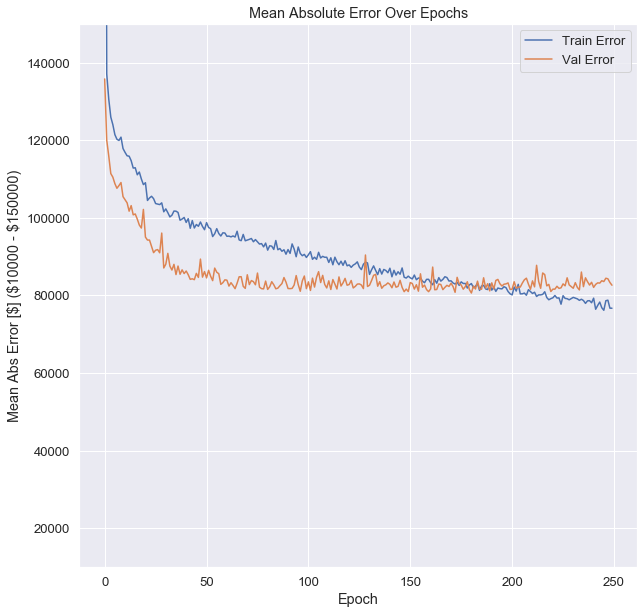

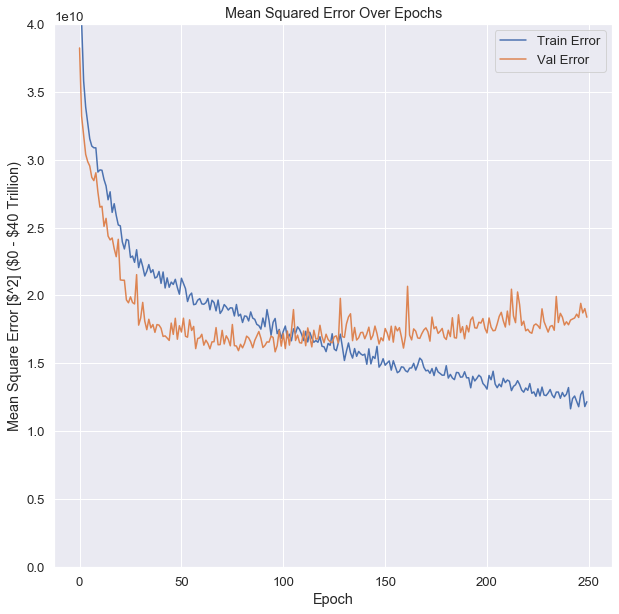

In [61]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    mean_abs_limit = [10000,150000]
    # mean_sq_limit  = [0,200000**2]
    
    plt.figure(figsize=(10, 10))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [$] (${} - ${})'.format(mean_abs_limit[0], mean_abs_limit[1]))
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.ylim(mean_abs_limit)
    plt.title("Mean Absolute Error Over Epochs")
    plt.legend()

    plt.figure(figsize=(10, 10))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$^2] ($0 - $40 Trillion)')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.ylim([0,200000**2])
    plt.title("Mean Squared Error Over Epochs")
    plt.legend()
    plt.show()

plot_history(model_history)

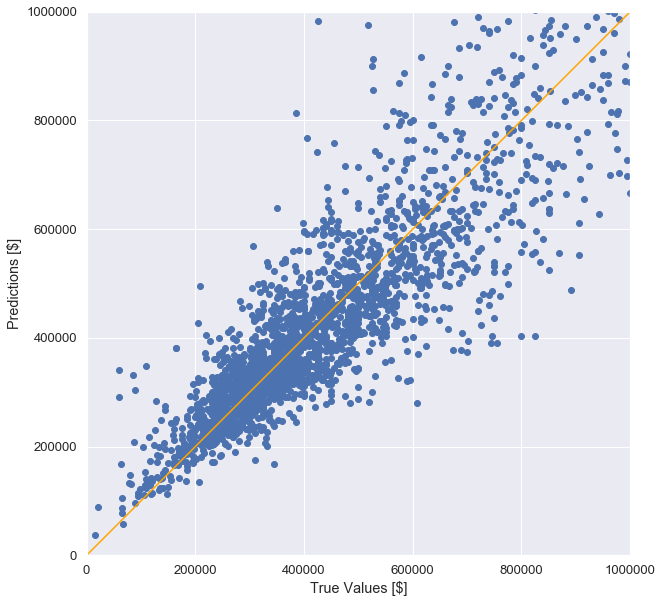

In [62]:
model_preds = model.predict(X_test).flatten()

plt.figure(figsize=(15, 10))
a = plt.axes(aspect='equal')
plt.scatter(y_test, model_preds)
plt.xlabel('True Values [$]')
plt.ylabel('Predictions [$]')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, color="orange")

In [63]:
nn_df = pd.DataFrame({"Actual": y_test, "Predicted": model_preds})
nn_df.head()

,Actual,Predicted
2019,403000,349175.5000
1595,649000,543260.8125
11511,565000,505022.2500
5140,315000,252310.2500
5858,355000,371144.0000


Text(0, 0.5, 'House Price [$]')

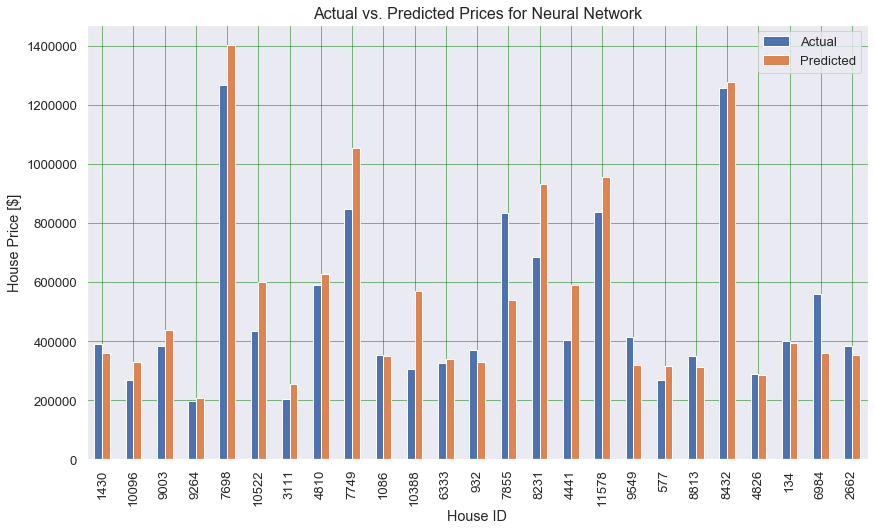

In [64]:
df4 = nn_df.sample(25)
df4.plot(kind="bar", figsize=(14, 8))
plt.legend()
plt.grid(which="major", linestyle="-", linewidth=0.5, color="green")
plt.grid(which="minor", linestyle=":", linewidth=0.5, color="blue")
plt.title("Actual vs. Predicted Prices for Neural Network", fontsize=16)
plt.xlabel("House ID")
plt.ylabel("House Price [$]")

In [65]:
# Complete list of scores, mean absolute error and accuracy:

print("Linear Regression:")
print("Accuracy: {:5.7f}".format(linear_acc))
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_linear_pred)) )
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_linear_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_linear_pred))) )

print("\nRandom Forest Regression:")
print("Accuracy: {:5.7f}".format(rf_acc))
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_rf_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_rf_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_rf_pred))))

print("\nGradient Boosting Regression:")
print("Accuracy: {:5.7f}".format(gb_acc))
print("Mean Absolute Error:     ${:5.2f}".format( metrics.mean_absolute_error(y_test, y_gb_pred) ))
print("Mean Squared Error:      ${:5.2f}".format( metrics.mean_squared_error(y_test, y_gb_pred)) )
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(metrics.mean_squared_error(y_test, y_gb_pred))))

print("\nNeural Network:")
print("Accuracy: Not applicable (if there is a method to compute neural network regression accuracte, inform me)")
print("Mean Absolute Error:     ${:5.2f}".format( mae ))
print("Mean Squared Error:      ${:5.2f}".format( mse ))
print("Root Mean Squared Error: ${:5.2f}".format( np.sqrt(mse)))

Linear Regression:
Accuracy: 0.7172320
Mean Absolute Error:     $125456.84
Mean Squared Error:      $30468765445.41
Root Mean Squared Error: $174553.04

Random Forest Regression:
Accuracy: 0.9967604
Mean Absolute Error:     $5560.02
Mean Squared Error:      $349072939.26
Root Mean Squared Error: $18683.49

Gradient Boosting Regression:
Accuracy: 0.9927431
Mean Absolute Error:     $16046.24
Mean Squared Error:      $781949560.75
Root Mean Squared Error: $27963.36

Neural Network:
Accuracy: Not applicable (if there is a method to compute neural network regression accuracte, inform me)
Mean Absolute Error:     $82207.66
Mean Squared Error:      $16922904576.00
Root Mean Squared Error: $130088.06


<h2>Conclusion</h2>
<p>The best algorithm tested here is the Random Forest Algorithm with over a 99.6% accuracy, just ever so slightly more than the Gradient Boost Algorithm at 99.2% accuracy. However, these algorithm's biggest flaw is overfitting, and with a such a high accuracy, this should be taken with a grain of salt with the absolute error of below \$20,000 for both of them.
<p>The Neural Network architecture here is the best overall with minimizing \$ error between training and validation and potential for exploding gradients and generalizing patterns in the dataset. The network here is susceptible to fluctuate in the validation, so the error can be anywhere as high as \$100,000 and low as \$80,000 for each epoch.
<p>The first model here, the Linear Regression model, it's not that effective with the given data, but can provide a base point for what to expect. A 71% accuracy for Linear Regression is not that bad really.

<h3>Potential improvements for the neural network</h3>
<p>Experimenting with kernel regularizers and using keras's keras-tuner to help optimize hyperparameters for the best neural network architecture. Right now, it hovers around \$80,000.